# **THE SPARKS FOUNDATION **
# Data Science & Business Analytics Internship
# By **Kamran khan**
# TASK-2: Perform Prediction using Unsupervised ML
##  From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Importing Necessary Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

### Loading Dataset 

In [61]:
df = pd.read_csv("iris.csv")

In [62]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
df.shape

(150, 6)

# Data Preprocessing

### Deleting Unnecessary columns

In [64]:
del df["Id"]

### Calculating some statistical Summary

In [65]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Displaying the info of dataset

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking the Values of Species in each group

In [67]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Checking Null values

In [68]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

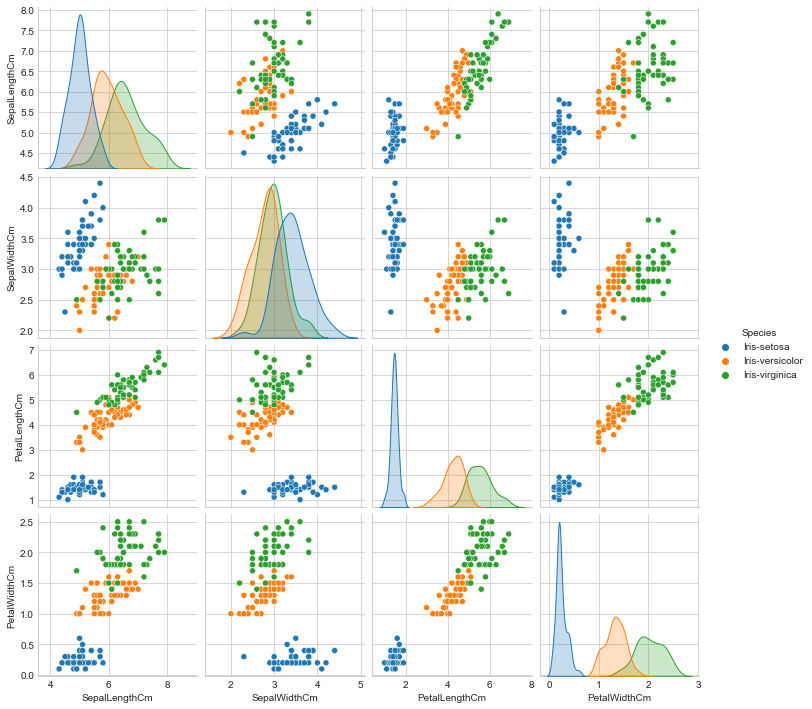

In [69]:
sns.pairplot(df, hue = "Species")

<AxesSubplot:>

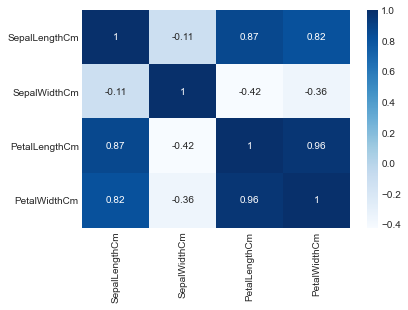

In [70]:
sns.heatmap(df.corr(), annot =True, cmap="Blues")

# **Four** Dimentional Iris Data

In [71]:
X = df.drop("Species", axis =1).values
X.shape

(150, 4)

### Elbow Method
Inertia Measures how spread out the clusters are (lower is better)
Distance from each sample to centroid of its cluster

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


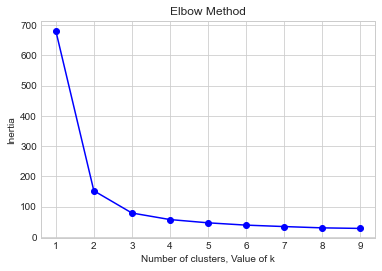

In [72]:
from sklearn.cluster import KMeans
no_of_clusters = np.arange(1, 10)
inertias = []

for k in no_of_clusters:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(no_of_clusters, inertias,  marker = "o", c='b')
plt.title("Elbow Method")
plt.xlabel('Number of clusters, Value of k')
plt.ylabel('Inertia')
plt.xticks(no_of_clusters)
plt.show()

### Fitting KMeans Model

In [73]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters = 3)

cluster.fit(X)

KMeans(n_clusters=3)

### Making Prediction

In [74]:
New_X = X[:3,:]

In [75]:
cluster.predict(New_X)

array([1, 1, 1])

# Two Dimentional Iris Data

In [76]:
X2D =df[["SepalLengthCm", "PetalLengthCm"]].values

### Fitting KMeans Model with 2 Dimentional Data

In [77]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 3)

kmean.fit(X2D)

KMeans(n_clusters=3)

### Making Predictions

In [78]:
labels = kmean.predict(X2D)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Finding Centroids of the clusters

In [79]:
centroids = kmean.cluster_centers_
centroids_X = centroids[:,0]
centroids_y = centroids[:,1]

### Plotting Clusters with Centroids

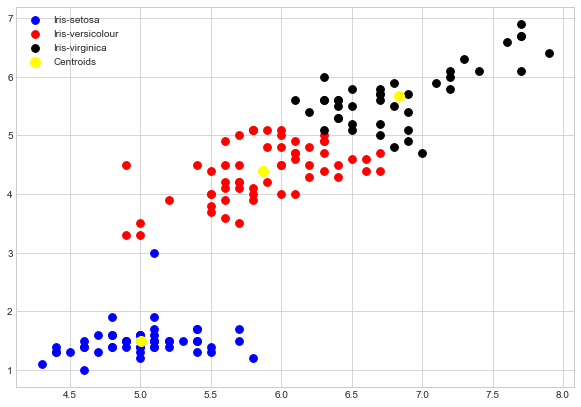

In [80]:
plt.figure(figsize =(10,7))
plt.scatter(X2D[labels == 0, 0], X2D[labels == 0, 1], s=60
            , c = 'blue', label = 'Iris-setosa')

plt.scatter(X2D[labels == 1, 0], X2D[labels == 1, 1], s=60,
             c = 'red', label = 'Iris-versicolour')

plt.scatter(X2D[labels == 2, 0], X2D[labels == 2, 1],s=60, 
             c = 'black', label = 'Iris-virginica')

plt.scatter(centroids_X, centroids_y, 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()